# Homework Assignment 5 - Chem 277B
## Flower Image Analysis

### 1) Objective

Before Convolutional Neural Networks (CNN) became available, K-means was an efficient method to segment images. Each pixel is represented by its RGB color vector. If we assume that pixel which belong to the same object should have the same color, then K-means should be able to cluster the pixel accordingly and therefore segment the image.<br> 
We want to analyze the Oxford 102 Flower Dataset using K-means clustering, hierarchical clustering, and decision tree classification and later in the course compare the results we obtain here to what we obtain using CNNs.<br>
<br>

### 2) Preparation

Before starting, we need to import the necessary libraries for data analysis and visualization.<br>
First, we import the standard libraries: 

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
from scipy.spatial.distance import pdist, squareform

Next, we need to load the dataset from `torchvision`

In [6]:
from torchvision.datasets import Flowers102 #pip install torchvision if necessary

Finally, we import our clustering methods:

In [9]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<br>

The dataset from `torchvision` contains various flower images and their corresponding labels.<br>
Run the following lines (it might take a few minutes!).

In [ ]:
transforms = lambda x: np.array(x) / 255
dataset_train = Flowers102(root='Data', split='train', download=True, transform=transforms)
dataset_val = Flowers102(root='Data', split='val', download=True, transform=transforms)
dataset_test = Flowers102(root='Data', split='test', download=True, transform=transforms)
labels_train = np.array(dataset_train._labels)
labels_val = np.array(dataset_val._labels)
labels_test = np.array(dataset_test._labels)

In [17]:
classes = np.array(["pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea","english marigold","tiger lily", "moon orchid",
    "bird of paradise", "monkshood","globe thistle", "snapdragon","colt's foot","king protea","spear thistle","yellow iris","globe-flower",
    "purple coneflower", "peruvian lily", "balloon flower", "giant white arum lily","fire lily","pincushion flower", "fritillary", "red ginger",
    "grape hyacinth","corn poppy", "prince of wales feathers","stemless gentian","artichoke","sweet william","carnation", "garden phlox",
    "love in the mist","mexican aster", "alpine sea holly", "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",  "lenten rose",
    "barbeton daisy", "daffodil", "sword lily", "poinsettia", "bolero deep blue", "wallflower","marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy","primula", "sunflower","pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?","cautleya spicata", "japanese anemone", "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania", "azalea", "water lily","rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani", "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow", "magnolia",
    "cyclamen",  "watercress", "canna lily", "hippeastrum", "bee balm", "ball moss", "foxglove", "bougainvillea","camellia","mallow","mexican petunia",
    "bromelia", "blanket flower", "trumpet creeper", "blackberry lily"])

<br>

2.1) We can display images in python using `plt.imshow(x)`, where *x* is the image. Show the first image from the dataset to understand what the data looks like.

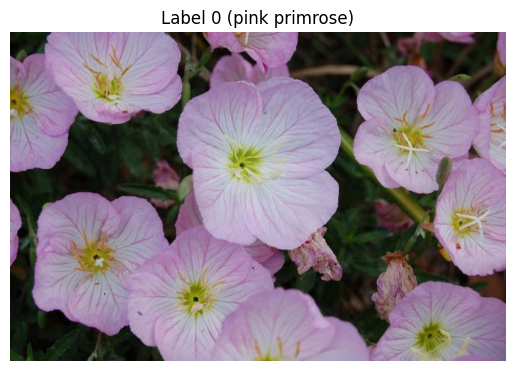

In [56]:
index = 0 #first image
x, y = dataset_train[index] #x: image, y: the label, classes[y]: the actual name of the flower (type str) 

######## Fill in the code below ########
plt.imshow(x)
plt.axis('off')
plt.title(f'Label {y} ({classes[y]})')
plt.show()
########################################

<br>

2.2) Print the shape and type of the image. Generate three plots, each showing the image only in one color channel in gray scale (`cmap='gray'`)! 

(500, 754, 3)
<class 'numpy.ndarray'>


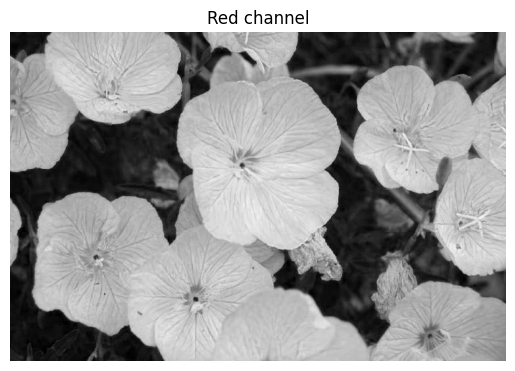

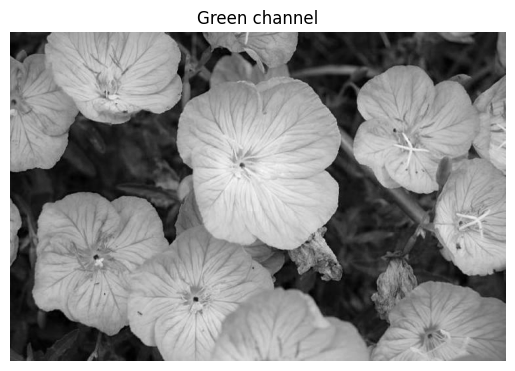

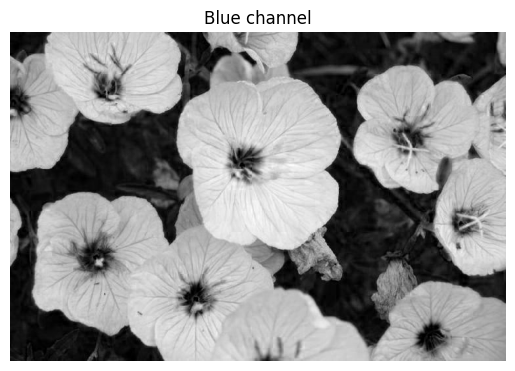

In [58]:
######## Fill in the code below ########
print(x.shape) #should be a 3D matrix with len(z) = 3
print(type(x))

for i, c in enumerate(["Red", "Green", "Blue"]):

    plt.imshow(x[:,:,i], cmap='gray')
    plt.axis('off')
    plt.title(c + ' channel')
    plt.show()
########################################

<br>

2.3) Show an image in the first 8 classes from the dataset to understand what the data looks like.

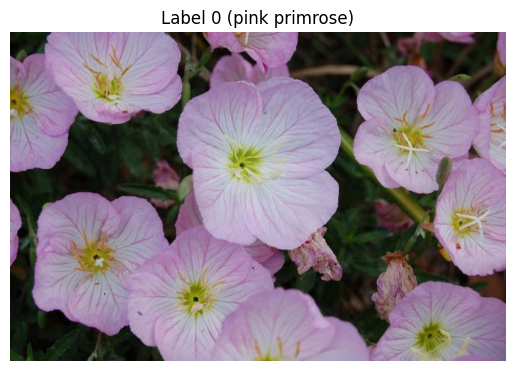

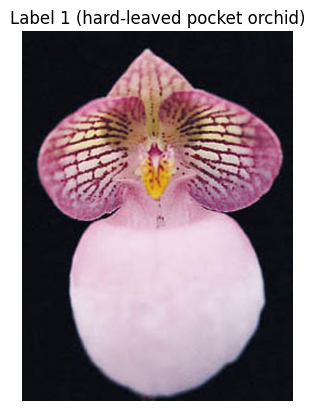

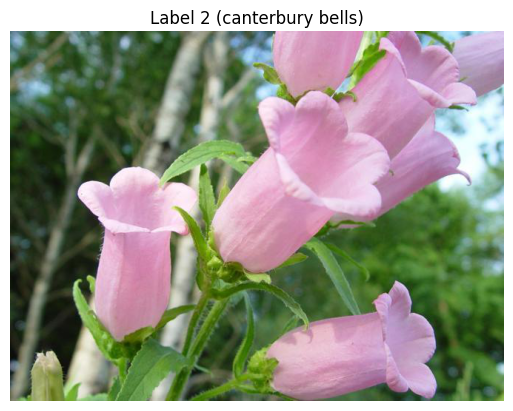

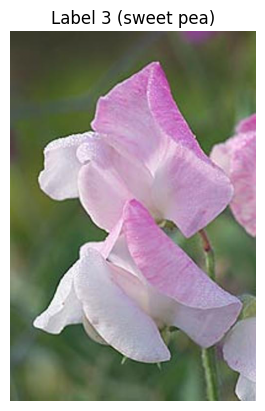

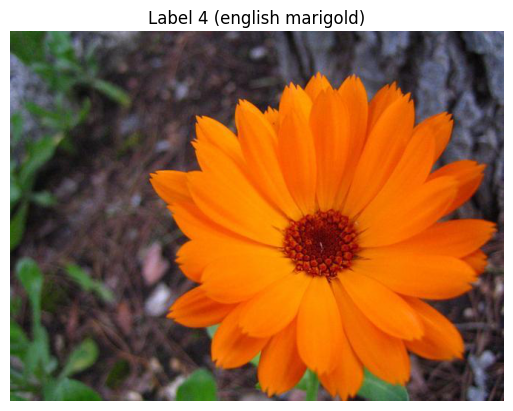

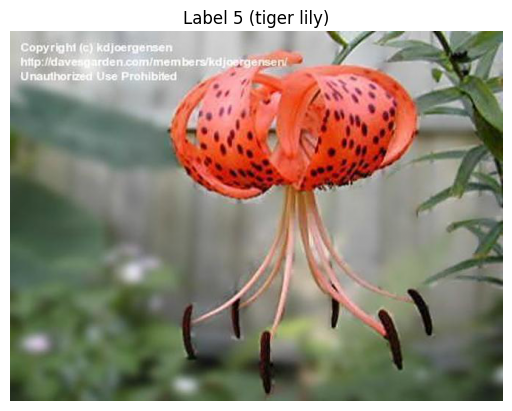

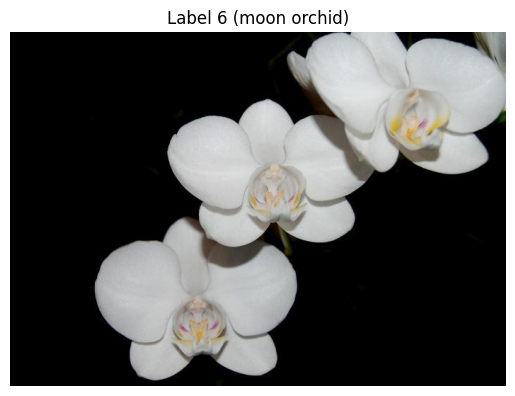

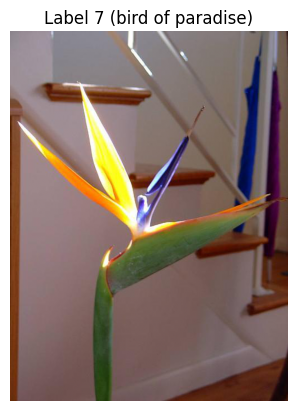

In [60]:
indices = [0, 10, 20, 30, 40, 50, 60, 70]

######## Fill in the code below ########
for index in indices:
    x, y = dataset_train[index]
    plt.imshow(x)
    plt.axis('off')
    plt.title(f'Label {y} ({classes[y]})')
    plt.show()
########################################

<br>

### 3) Image Segmentation

3.1) Segment the first image in the training set using K-means clustering. Reshape the image into a 2D array where each row represents a pixel and each column represents a color channel (RGB), and then apply K-means clustering to cluster the pixels. Visualize the segmented image and discuss what you observe.

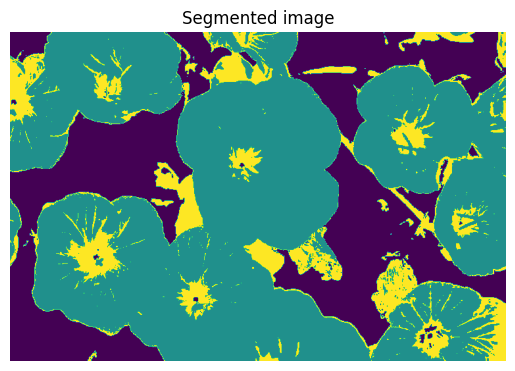

In [62]:
index = 0

######## Fill in the code below ########
x, y = dataset_train[index]
H, W, C = x.shape
x_flat = x.reshape(H * W, C)

kmeans     = KMeans(n_clusters=3, random_state=42)
pxl_labels = kmeans.fit_predict(x_flat)

plt.imshow(pxl_labels.reshape(H, W))
plt.axis('off')
plt.title('Segmented image')
plt.show()
########################################

> The segmented image shows distinct color regions corresponding to different parts of the flower and background. Visually, the first cluster represents the background, the second cluster represents the flower, and the third cluster represents the stems. This segmentation helps in identifying different components of the image based on color similarity.

3.2) Visualize the center of each cluster as a color using `plt.imshow(colors.reshape(.., .., ..))`. What does this tell you about the image?

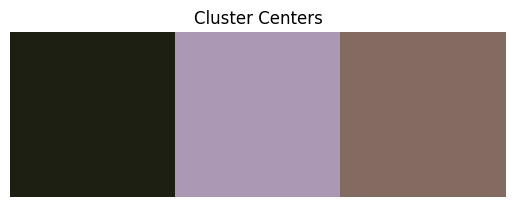

In [64]:
######## Fill in the code below ########
colors = kmeans.cluster_centers_
plt.imshow(colors.reshape(1, -1, 3))
plt.axis('off')
plt.title('Cluster Centers')
plt.show()
########################################

> The cluster centers represent the dominant colors in the image. The first cluster center is a shade of dark green corresponding to the ground, the second cluster center is a shade of pinkish purple corresponding to the flower, and the third cluster center is a shade of brown corresponding to the stems. This indicates that the image has distinct color regions that can be effectively captured using K-means clustering.

3.3) Reconstruct the image using the cluster centers and the labels assigned to each pixel. Does the reconstructed image capture the main features of the original image? Discuss your observations.

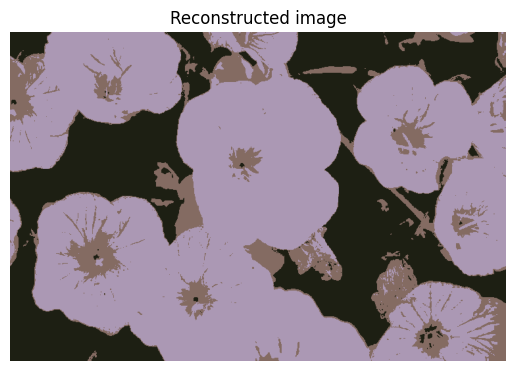

In [66]:
plt.imshow(colors[pxl_labels].reshape(H, W, C))
plt.axis('off')
plt.title('Reconstructed image')
plt.show()

> The reconstructed image captures the main features of the original image, such as the flower and background. Some details are lost due to the limited number of clusters used in K-means clustering. The reconstructed image appears more abstract and less detailed compared to the original image, but it still effectively represents the overall structure and color distribution of the scene.

<br>

### 4) Image Clustering

4.1) Use hierarchical clustering (`sns.clustermap`) to cluster the first 8 classes of images in the training set. Compute the mean color of the first image in the class and use the mean colors as features. Next, based on the mean colors, generate a distance square matrix (you can use `pdist(your_means, metric='euclidean')`) for clustering. Visualize the resulting dendrogram and discuss what you observe.

C:\Users\MMH_user\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\MMH_user\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


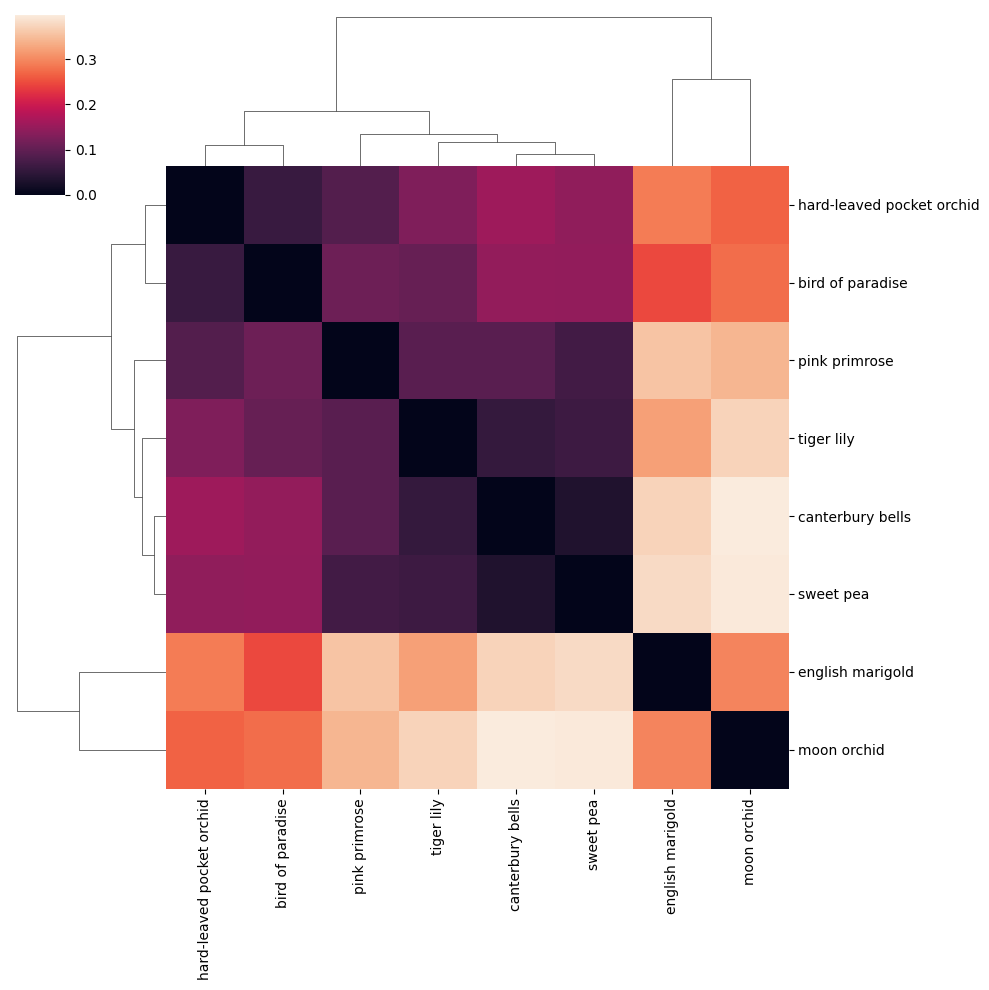

In [75]:
indices = [0, 10, 20, 30, 40, 50, 60, 70]
ticks = classes[labels_train[indices]]

######## Fill in the code below ########
xs = np.empty((len(indices), 3))
for i, index in enumerate(indices):
    x, y = dataset_train[index]
    x_flat = x.reshape(-1, 3)
    xs[i] = x_flat.mean(axis=0)
    
dist = squareform(pdist(xs, metric='euclidean'))

sns.clustermap(dist, xticklabels=ticks, yticklabels=ticks)
plt.show()
########################################

> All the pink flowers (pink primrose, hard-leaved pocket orchid, canterbury bells, sweet pea) are clustered together, while the other flowers (english marigold, moon orchid) are more spread out. This suggests that color is a significant feature for clustering these images, and similar colors tend to group together. However, some flowers (tiger lily, bird of paradise) with different colors are also clustered with the main group, indicating that the mean color alone may not fully capture the complexity of the images.

<br>

### 5) Classification

5.1) Perform decision tree classification using `DecisionTreeClassifier` to predict the flower species based on the features from the K-means clustering. Train the decision tree classifier for class 0 (pink primrose) and class 4 (english marigold) on the training set and evaluate its performance on the validation set by creating a **confusion matrix plot** for both, training and evaluation set. Discuss why or why not the features from K-means clustering might be effective for this classification task.

Training accuracy: 1.0


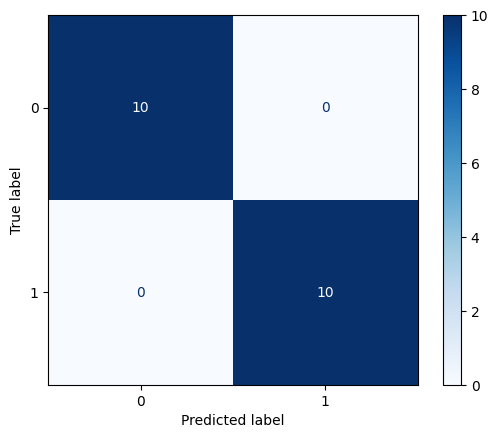

Validation accuracy: 0.9


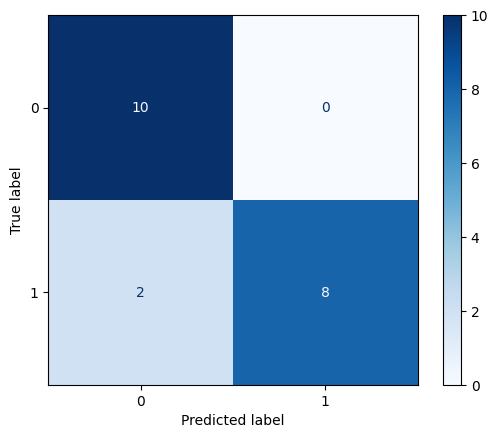

In [80]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

######## Fill in the code below ########
def extract_features(image, n_clusters=2):
    x_flat = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x_flat)
    colors = kmeans.cluster_centers_
    return colors.flatten()

n_clusters = 2
x_train = np.empty((len(indices_train), n_clusters * 3))
for i, index in enumerate(indices_train):
    x, y = dataset_train[index]
    x_train[i] = extract_features(x, n_clusters=n_clusters)
y_train = labels_train[indices_train]
x_val = np.empty((len(indices_val), n_clusters * 3))
for i, index in enumerate(indices_val):
    x, y = dataset_val[index]
    x_val[i] = extract_features(x, n_clusters=n_clusters)
y_val = labels_val[indices_val]

tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

print('Training accuracy:', tree.score(x_train, y_train))
cm = confusion_matrix(y_train, tree.predict(x_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

print('Validation accuracy:', tree.score(x_val, y_val))
cm = confusion_matrix(y_val, tree.predict(x_val))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
########################################

> The K-means cluster centers represent the dominant colors in the image. Each center corresponds to a specific color that is prevalent in the segmented regions of the image. This information can be useful for understanding the color composition of the flower and its surroundings.

Visualize the decision tree and interpret the results. Discuss which features are most important for classification and how well the model performs. You can visualize the features as colors to help interpret the decision tree.

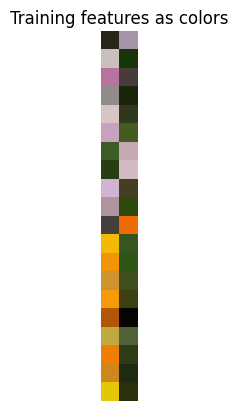

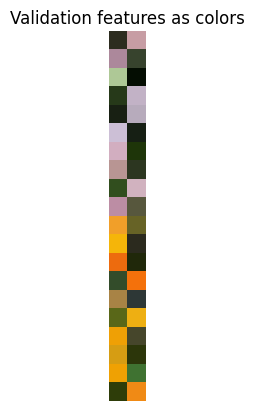

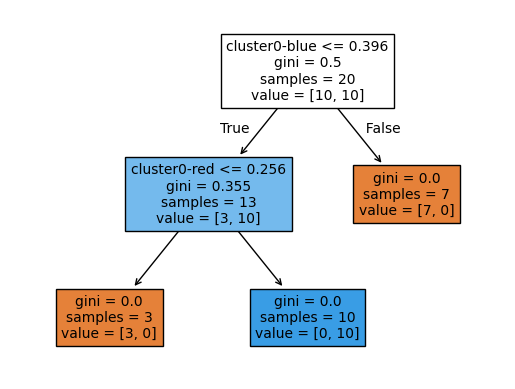

In [83]:
plt.imshow(x_train.reshape(-1, n_clusters, 3))
plt.axis('off')
plt.title('Training features as colors')
plt.show()

plt.imshow(x_val.reshape(-1, n_clusters, 3))
plt.axis('off')
plt.title('Validation features as colors')
plt.show()

feature_names = [f'cluster{i}-{c}' for i in range(n_clusters) for c in ['red', 'green', 'blue']]
plot_tree(tree, filled=True, feature_names=feature_names, fontsize=10)
plt.show()

> The major difference between the two classes is the presence of a pinkish color in the pink primrose versus a more yellowish color in the english marigold. The decision tree effectively uses these color features to classify the images, achieving reasonable accuracy on the validation set. The visualization of the decision tree shows that the most important features for classification are the blue and red color channels, which align with the color differences between the two flower species.

5.2) Try a little more feature engineering by, for example, converting the RGB color space to HSV color space (`image = rgb_to_hsv(image)`) before applying K-means clustering, as well as sorting the cluster centers before flattening them into a feature vector. See if these changes improve the classification performance.

Training accuracy: 1.0


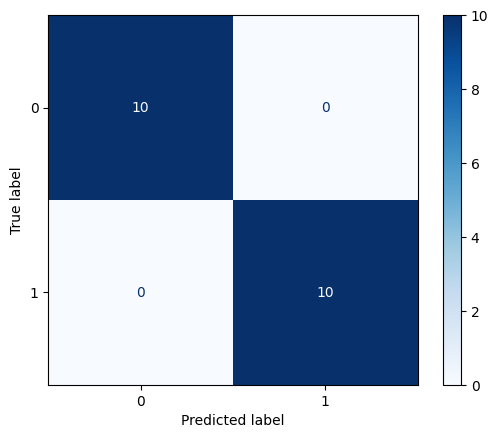

Validation accuracy: 1.0


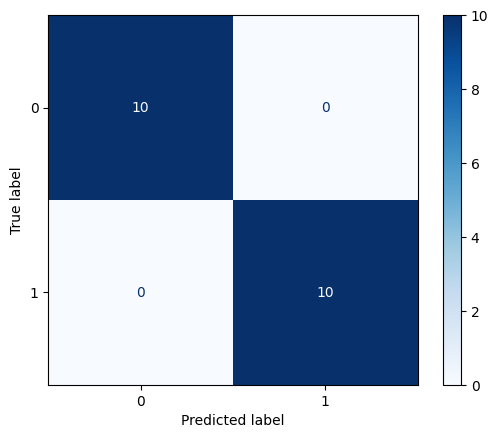

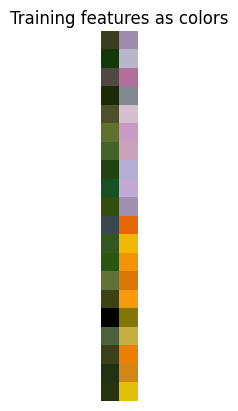

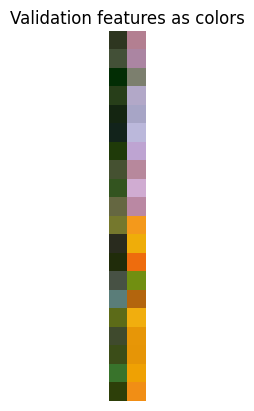

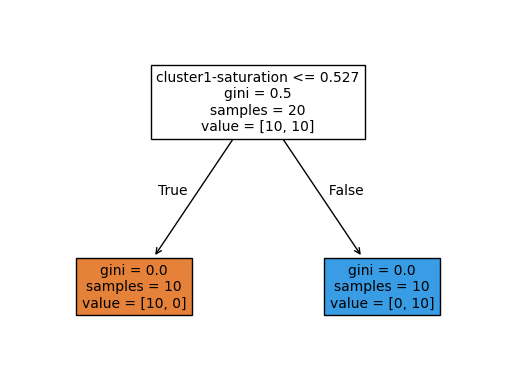

In [86]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

######## Fill in the code below ########
def extract_features(image, n_clusters=2):
    image = rgb_to_hsv(image)
    x_flat = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x_flat)
    colors = kmeans.cluster_centers_
    colors = colors[np.argsort(colors[:, 2])]
    return colors.flatten()

n_clusters = 2
x_train = np.empty((len(indices_train), n_clusters * 3))
for i, index in enumerate(indices_train):
    x, y = dataset_train[index]
    x_train[i] = extract_features(x, n_clusters=n_clusters)
y_train = labels_train[indices_train]
x_val = np.empty((len(indices_val), n_clusters * 3))
for i, index in enumerate(indices_val):
    x, y = dataset_val[index]
    x_val[i] = extract_features(x, n_clusters=n_clusters)
y_val = labels_val[indices_val]

tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

print('Training accuracy:', tree.score(x_train, y_train))
cm = confusion_matrix(y_train, tree.predict(x_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

print('Validation accuracy:', tree.score(x_val, y_val))
cm = confusion_matrix(y_val, tree.predict(x_val))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

plt.imshow(hsv_to_rgb(x_train.reshape(-1, n_clusters, 3)))
plt.axis('off')
plt.title('Training features as colors')
plt.show()

plt.imshow(hsv_to_rgb(x_val.reshape(-1, n_clusters, 3)))
plt.axis('off')
plt.title('Validation features as colors')
plt.show()

feature_names = [f'cluster{i}-{c}' for i in range(n_clusters) for c in ['hue', 'saturation', 'value']]
plot_tree(tree, filled=True, feature_names=feature_names, fontsize=10)
plt.show()
########################################

> The major issue with the previous features was that the order of the cluster centers was arbitrary, leading to inconsistent feature vectors. By sorting the cluster centers based on their values in the HSV color space, we ensured a consistent order, which improved the classification performance. The decision tree achieved higher accuracy on the validation set with these new features, indicating that the feature engineering step was beneficial.

5.3) Try your final classification method on class 0 (pink primrose) and class 1 (hard-leaved pocket orchid). How well does it perform? Discuss what kind of features we have not considered that might help improve the classification.

Training accuracy: 1.0


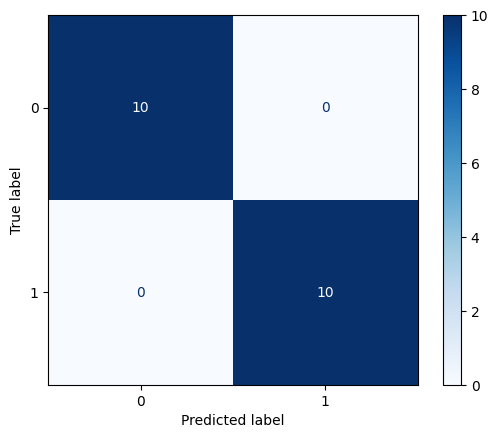

Validation accuracy: 0.65


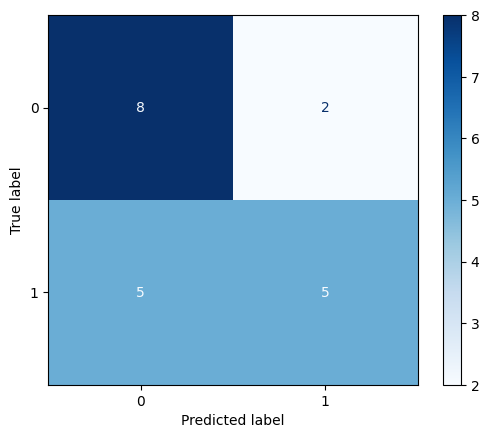

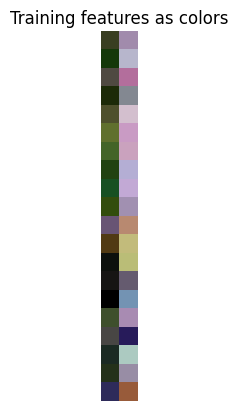

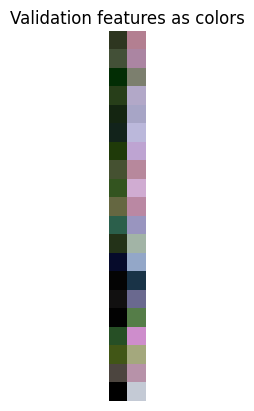

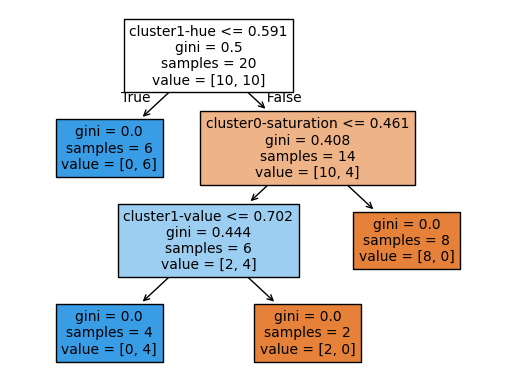

In [90]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

######## Fill in the code below ########
def extract_features(image, n_clusters=2):
    x_flat = rgb_to_hsv(image.reshape(-1, 3))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x_flat)
    colors = kmeans.cluster_centers_
    colors = colors[np.argsort(colors[:, 2])]
    return colors.flatten()

n_clusters = 2
x_train = np.empty((len(indices_train), n_clusters * 3))
for i, index in enumerate(indices_train):
    x, y = dataset_train[index]
    x_train[i] = extract_features(x, n_clusters=n_clusters)
y_train = labels_train[indices_train]
x_val = np.empty((len(indices_val), n_clusters * 3))
for i, index in enumerate(indices_val):
    x, y = dataset_val[index]
    x_val[i] = extract_features(x, n_clusters=n_clusters)
y_val = labels_val[indices_val]

tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

print('Training accuracy:', tree.score(x_train, y_train))
cm = confusion_matrix(y_train, tree.predict(x_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

print('Validation accuracy:', tree.score(x_val, y_val))
cm = confusion_matrix(y_val, tree.predict(x_val))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

plt.imshow(hsv_to_rgb(x_train.reshape(-1, n_clusters, 3)))
plt.axis('off')
plt.title('Training features as colors')
plt.show()

plt.imshow(hsv_to_rgb(x_val.reshape(-1, n_clusters, 3)))
plt.axis('off')
plt.title('Validation features as colors')
plt.show()

feature_names = [f'cluster{i}-{c}' for i in range(n_clusters) for c in ['hue', 'saturation', 'value']]
plot_tree(tree, filled=True, feature_names=feature_names, fontsize=10)
plt.show()
########################################

> The colors of the two flower species are quite similar, making it challenging for the decision tree to distinguish between them based solely on color features. The model achieved lower accuracy on the validation set compared to the previous classification task. To improve classification, we could consider additional features such as texture, shape, or spatial arrangement of colors within the images. These features could provide more discriminative information to help differentiate between similar flower species.